# __Activity 4__
## Rachel Nana, December 2018 - January 2018

__Importing Packages__

In [1]:
import pandas as pd
import sklearn
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import randint

__Importing Telco Data__

In [2]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv');
telco.drop('customerID', axis=1, inplace=True)

__Data Prep__

Variables

In [3]:
X = telco.loc[:, telco.columns != 'Churn']
y = telco.loc[:, 'Churn']

Split The Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
sum(X_train['TotalCharges'].eq(' '))

10

In [6]:
sum(X_test['TotalCharges'].eq(' '))

1

In [7]:
class ReplaceBlanks(TransformerMixin):    
    def transform(self, X, y=None, **kwargs):
        new = X.replace(" ", np.nan, inplace=True)
        return new

    def fit(self, X, y=None, **kwargs):
        return self

In [8]:
RB = ReplaceBlanks()
RB.transform(X_train)
RB.transform(X_test)

C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [9]:
sum(X_train['TotalCharges'].eq(' '))

0

In [10]:
sum(X_test['TotalCharges'].eq(' '))

0

In [11]:
X_train['TotalCharges'].isnull().sum()

10

In [12]:
X_test['TotalCharges'].isnull().sum()

1

In [13]:
class TotalChargesImputer(TransformerMixin):    
    def transform(self, X, y=None, **kwargs):
        X['TotalCharges'] = X['TotalCharges'].astype('float')
        X['TotalCharges'].fillna((X['TotalCharges'].mean()), inplace=True)
        return X

    def fit(self, X, y=None, **kwargs):
        return self

In [14]:
TCI = TotalChargesImputer()
TCI.transform(X_train)
TCI.transform(X_test)

C:\Users\rfowl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
1263,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.60
3732,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),77.15,1759.40
1672,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),72.10,5016.65
811,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.00,7250.15
2526,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,19.40


In [15]:
X_train['TotalCharges'].isnull().sum()

0

In [16]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [17]:
X_test['TotalCharges'].isnull().sum()

0

Standardize

In [18]:
scaler = StandardScaler()
scaler.fit(X_train.loc[:,['tenure','MonthlyCharges','TotalCharges']])
X_train.loc[:,['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_train.loc[:,['tenure','MonthlyCharges','TotalCharges']])
X_test.loc[:,['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test.loc[:,['tenure','MonthlyCharges','TotalCharges']])

C:\Users\rfowl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rfowl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\rfowl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 

In [19]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [20]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,-0.465683,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,-0.000474,-4.221050e-01
1623,Female,0,No,No,0.885537,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),1.074754,1.255360e+00
6074,Male,0,Yes,No,-1.284605,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,-1.376499,-1.002991e+00
1362,Male,0,No,No,-1.161766,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.177346,-9.081194e-01
6754,Male,0,No,Yes,-1.325551,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),-0.098524,1.206791e-15


In [21]:
y_train.head()

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

In [22]:
class CreateInds(BaseEstimator, TransformerMixin):    
    def transform(self, X, y, **kwargs):
        try:
            categorical_values = X.select_dtypes(include=[object]).columns.values
            new_X = pd.get_dummies(X, categorical_values)
            new_X = new_X.drop(['gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'PaperlessBilling_No', 'PaymentMethod_Bank transfer (automatic)'], axis=1)
            new_X = new_X.rename(index=str, columns={"gender_Male": "Male_ind", "Partner_Yes": "Partner_ind", "Dependents_Yes": "Dependents_ind", "PhoneService_Yes": "PhoneService_ind", "MultipleLines_Yes": "MultipleLines_ind", "InternetService_DSL": "DSL_ind", "InternetService_Fiber optic": "FiberOptic_ind", "OnlineSecurity_Yes": "OnlineSecurity_ind", "OnlineBackup_Yes": "OnlineBackup_ind", "DeviceProtection_Yes": "DeviceProtection_ind", "TechSupport_Yes": "TechSupport_ind", "StreamingTV_Yes": "StreamingTV_ind", "StreamingMovies_Yes": "StreamingMovies_ind", "PaperlessBilling_Yes": "PaperlessBilling_ind"})
            
            new_y = pd.get_dummies(y, drop_first=True)
            
            return (new_X, new_y)
        except Exception as err:
            print('CreateInds.transform(): {}'.format(err))
        return (X, y)

    def fit(self, X, y, **kwargs):
        return self

In [23]:
#CI = CreateInds()
#(X_train, y_train) = CI.transform(X=X_train, y=y_train)
#(X_test, y_test) = CI.transform(X=X_test, y=y_test)

In [24]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,-0.465683,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,-0.000474,-4.221050e-01
1623,Female,0,No,No,0.885537,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),1.074754,1.255360e+00
6074,Male,0,Yes,No,-1.284605,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,-1.376499,-1.002991e+00
1362,Male,0,No,No,-1.161766,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.177346,-9.081194e-01
6754,Male,0,No,Yes,-1.325551,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),-0.098524,1.206791e-15


In [25]:
y_train.head()

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

In [26]:
list(X_train)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

## Model

train model

In [27]:
# RF_grid = RandomForestClassifier(criterion="gini", max_depth=9, n_estimators=200)
# RF_grid.fit(X_train, y_train)

predictions

In [29]:
# from sklearn.metrics import roc_curve, roc_auc_score, log_loss
# from matplotlib import pyplot as plt
# from sklearn.metrics import log_loss

In [30]:
# predictions_RF = RF_grid.predict_proba(X_test)
# roc_score_RF = roc_auc_score(y_test, predictions_RF[:,1])
# log_loss_RF = log_loss(y_test, predictions_RF[:,1], eps=1e-15)
# print("ROC Score: {}".format(roc_score_RF))
# print("Log Loss: {}".format(log_loss_RF))

ROC Score: 0.863156914095252
Log Loss: 0.399475156974175


ROC curve

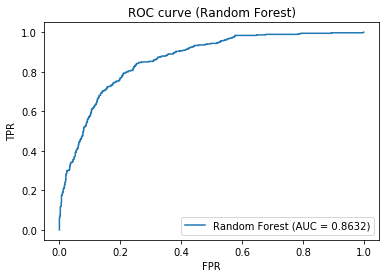

In [31]:
# fpr_RF, tpr_RF, _ = roc_curve(y_test, predictions_RF[:,1])
# plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUC = %0.4f)' % roc_score_RF)
# plt.legend(loc="lower right")
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC curve (Random Forest)')
# plt.show()

Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer

In [34]:
RandForest = RandomForestClassifier()
CI = CreateInds()
pipe = Pipeline([('CI', CI), ('RF', RandForest)])

In [36]:
pipe.set_params(RF__criterion="gini", RF__max_depth=9, RF__n_estimators=200)

Pipeline(memory=None,
     steps=[('CI', CreateInds()), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [37]:
pipe.fit(X_train, y_train)

TypeError: transform() missing 1 required positional argument: 'y'

In [53]:
prediction = pipe.predict(X_test)

In [54]:
pipe.score(X_test, y_test)

0.8041163946061036